# Исследование работы социальных организаций

**Задача**

Провести сравнительный анализ социальных организаций с целью выявления узких мест и потенциальных точек роста эффективности.

**Описание данных**

Таблица `Clients`:
- `CLIENT_ID` — уникальный идентификатор клиента;
- `SEX` — пол клиента;
- `AGE` — возраст клиента.

Таблица `Services`:
- `SERVICE_ID` — уникальный идентификатор услуги;
- `SERVICENAME` — наименование услуги;
- `SERVICETIME` — дата предоставления услуги;
- `CLIENT_ID` — уникальный идентификатор клиента.

Таблица `Company_Rate`:
- `COMPANY_NAME` — наименование организации;
- `CLIENT_ID` — уникальный идентификатор клиента;
- `RATE` — требуемая ставка доходности;

Таблица `Service_x_costs`:
- `SERVICE_ID` — уникальный идентификатор услуги;
- `COSTS` — расходы на услуги;
- `RATE` — требуемая ставка доходности;

**План работы:**
1. Обзор данных.
2. Предобработка данных:
 - замена названий столбцов (при необходимости);
 - обработка пропусков (при необходимости);
 - изменение типа данных (при необходимости);
 - устранение дубликатов (при необходимости).
3. Сравнительный анализ социальных организаций:
 - количество клиентов и предоставленных услуг;
 - сколько услуг в среднем получали клиенты;
 - в какие периоды предоставлено больше всего услуг;
 - услуги, которые пользовались наибольшим спросом;
 - размер выручки и прибыли; 
 - средняя прибыль с клиента;
 - самые маржинальные услуги.
4. Вывод.

In [1]:
#Импортируем библиотеки, которые понядобятся нам в работе
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Обзор данных

In [2]:
# Прочитаем файлы
clients = pd.read_csv('Clients.csv', sep = ';')
services = pd.read_csv('Services.csv', sep = ';')
service_costs = pd.read_csv('Service_x_costs.csv', sep = ';')
company_rate = pd.read_csv('Company_Rate.csv', sep = ';')

In [3]:
# Напишем функцию, чтобы вывести первые 5 строк 
def df_head(df, df1, df2, df3):
    display(df.head())
    display(df1.head())
    display(df2.head())
    display(df3.head())

In [4]:
# Посмотрим первые 5 строк каждого датасета
df_head(clients, services, service_costs, company_rate)

,CLIENT_ID,SEX,AGE
0,1,М,34
1,2,Ж,34
2,3,М,31
3,4,Ж,41
4,5,Ж,21


,SERVICE_ID,SERVICENAME,SERVICETIME,CLIENT_ID
0,2,Социально-правовые,29.10.2022,1885.0
1,2,Социально-правовые,25.03.2022,1967.0
2,2,Социально-правовые,25.02.2022,1885.0
3,2,Социально-правовые,03.10.2022,1885.0
4,2,Социально-правовые,27.10.2022,1885.0


,SERVICE_ID,COSTS
0,1,656.64
1,2,771.55
2,3,614.90
3,4,1410.27
4,5,1023.03


,COMPANY_NAME,CLIENT_ID,RATE
0,Социальная организация №6,1,"1,25"
1,Социальная организация №2,2,"1,25"
2,Социальная организация №5,3,"1,3"
3,Социальная организация №1,4,"1,2"
4,Социальная организация №5,5,"1,3"


In [5]:
# Напишем функцию, чтобы вывести общую информацию о датасетах
def df_info(df, df1, df2, df3):
    display(df.info())
    display(df1.info())
    display(df2.info())
    display(df3.info())

In [6]:
# Посмотрим общую информацию о датасетах
df_info(clients, services, service_costs, company_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 3 columns):
CLIENT_ID    2371 non-null int64
SEX          2371 non-null object
AGE          2371 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30672 entries, 0 to 30671
Data columns (total 4 columns):
SERVICE_ID     30672 non-null int64
SERVICENAME    30672 non-null object
SERVICETIME    30535 non-null object
CLIENT_ID      30602 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 958.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
SERVICE_ID    5 non-null int64
COSTS         5 non-null float64
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 3 columns):
COMPANY_NAME    2371 non-null object
CLIENT_ID       2371 non-null int64
RATE            2371 non-null object
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


None

### Краткий вывод
- В таблицах `clients`, `services`, `service_costs`, `company_rate` нужно привести названия колонок к нижнему регистру и snake_case
- В таблице `services` колонки `SERVICETIME` нужно привести к типу данных datetime, `CLIENT_ID` к int. Также нужно обработать пропуски данных.
- В таблице `service_costs` колонку `COSTS` нужно привести к типу данных float.
- В таблице `company_rate` колонку `RATE` нужно привести к типу данных float.

## Предобработка данных

### Замена названий столбцов

In [7]:
# Приведем названия столбцов к нижнему регистру и snake_case
clients.columns = [x.lower() for x in clients.columns]
services.columns = [x.lower().replace('name','_name').replace('time','_time') for x in services.columns]
service_costs.columns = [x.lower() for x in service_costs.columns]
company_rate.columns = [x.lower() for x in company_rate.columns]

### Обработка пропусков в данных

In [8]:
# Посмотрим кол-во пропусков в датасете services
display(services.isnull().sum().sort_values(ascending = False))

# Посмотрим кол-во строк в датасете services
print(f'Общее количество строк: {len(services)}')

# Посмотрим кол-во непересекающихся пропусков в датасете services
print(f'Общее кол-во непересекающихся пропусков: \
{len(services.loc[(services["service_time"].isnull()) | (services["client_id"].isnull())])}')

# Посмотрим кол-во строк в датасете services, в которых пересекаются пропуски
print(f'Общее количество пересечений в пропусках: \
{len(services.loc[(services["service_time"].isnull()) & (services["client_id"].isnull())])}')

service_time    137
client_id        70
service_name      0
service_id        0
dtype: int64

Общее количество строк: 30672
Общее кол-во непересекающихся пропусков: 203
Общее количество пересечений в пропусках: 4


**Поскольку пропусков относительно мало и мы не можем заменить их на подходящие значения, поэтому мы избавимся от них.**

In [9]:
# Отфильтруем датасет services
services = services.loc[~(services['service_time'].isnull()) & ~(services['client_id'].isnull())]

# Проверим результат
display(services.isnull().sum())

# Посмотрим кол-во строк в датасете services
print(f'Общее количество строк после фильтрации: {len(services)}')

service_id      0
service_name    0
service_time    0
client_id       0
dtype: int64

Общее количество строк после фильтрации: 30469


### Изменение типа данных

In [10]:
# Для корректной работы функции to_numeric, мы заменим ',' на '.'
company_rate['rate'] = company_rate['rate'].str.replace(',','.')

# Приведем колонки датасетов к нужным типам данных
services['service_time'] = pd.to_datetime(services['service_time'])
services['client_id'] = services['client_id'].astype(int)
service_costs['costs'] = pd.to_numeric(service_costs['costs'])
company_rate['rate'] = pd.to_numeric(company_rate['rate'])

### Поиск дубликатов

In [11]:
# Напишем фукнцию, которая будет находить дубликаты
def find_dup(df, df1, df2, df3):
    print(f'Общее количество дубликатов в датасете clients: {df.duplicated().sum()}')
    print(f'Общее количество дубликатов в датасете services: {df1.duplicated().sum()}')
    print(f'Общее количество дубликатов в датасете service_costs: {df2.duplicated().sum()}')
    print(f'Общее количество дубликатов в датасете company_rate: {df3.duplicated().sum()}')

# Посмотрим в каких датасетах у нас есть дубликаты
find_dup(clients, services, service_costs, company_rate)

Общее количество дубликатов в датасете clients: 0
Общее количество дубликатов в датасете services: 149
Общее количество дубликатов в датасете service_costs: 0
Общее количество дубликатов в датасете company_rate: 0


In [12]:
# Удалим дубликаты
services = services.drop_duplicates()

# Проверим результат
print(f'Общее количество дубликатов после очистки: {services.duplicated().sum()}')

Общее количество дубликатов после очистки: 0


**Явные дубликаты отсутствуют**

In [13]:
# Проверим неявные дубликаты
company_rate['company_name'].unique()

array(['Социальная организация №6', 'Социальная организация №2',
       'Социальная организация №5', 'Социальная организация №1',
       'Социальная организация №3', 'Социальная организация №4',
       'Социальное учреждение N6', 'Социальное учреждение 3',
       'Соц организация 3', 'Соц организация 2',
       'Социальная организация 2', 'Соц организация №1',
       'Социальное учреждение №5'], dtype=object)

In [14]:
#Напишем функцию, которая устранит неявные дубликаты
change_names = {'Соц организация №1':'Социальная организация №1',\
                'Социальная организация 2':'Социальная организация №2',\
                'Соц организация 2':'Социальная организация №2',\
                'Социальное учреждение 3':'Социальная организация №3',\
                'Соц организация 3':'Социальная организация №3',\
                 'Социальное учреждение №5':'Социальная организация №5',\
                'Социальное учреждение N6':'Социальная организация №6'}

def company_name(df, change_names):
        for name, change_value in change_names.items():
            if name in df:
                df = str(df).replace(name, change_value)
        return df
    
company_rate['company_name'] = company_rate['company_name'].apply(lambda x: company_name(x, change_names))

# Проверим изменения
company_rate['company_name'].unique()

array(['Социальная организация №6', 'Социальная организация №2',
       'Социальная организация №5', 'Социальная организация №1',
       'Социальная организация №3', 'Социальная организация №4'],
      dtype=object)

In [15]:
# Проверим сделанные изменения
df_info(clients, services, service_costs, company_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 3 columns):
client_id    2371 non-null int64
sex          2371 non-null object
age          2371 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30320 entries, 0 to 30670
Data columns (total 4 columns):
service_id      30320 non-null int64
service_name    30320 non-null object
service_time    30320 non-null datetime64[ns]
client_id       30320 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
service_id    5 non-null int64
costs         5 non-null float64
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 3 columns):
company_name    2371 non-null object
client_id       2371 non-null int64
rate            2371 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 55.6+ KB


None

### Краткий вывод
- Названия столбцов в таблицах `clients`, `services`, `service_costs`, `company_rate` приведены к нижнему регистру и snake_case.
- Обработаны пропуски данных в таблице `services`.
- Изменены типы данных в колонках `service_time`, `client_id`, `costs`, `rate`.
- Устранены явные дубликаты в таблице `services` и неявные дубликаты в таблице `company_rate` - колонка `company_name`.

## Сравнительный анализ социальных организаций

In [16]:
# Проверим за какой период у нас есть данные
print(f'Данные представлены за период с {services["service_time"].min()} по {services["service_time"].max()}.')

Данные представлены за период с 2022-01-02 00:00:00 по 2022-12-31 00:00:00.


**В 2022 году, социальные организации работали с 5 января.**

In [17]:
# Посмотрим кол-во оказанных услуг в 2022 году.
print(f'Общее количество оказанных услуг в 2022 году: {len(services)}')

# Посмотрим кол-во оказанных услуг до 5 января 2022
print(f'Общее количество оказанных услуг до 5 января 2022 года: \
{len(services.loc[services["service_time"] < "2022-01-05 00:00:00"])}')

Общее количество оказанных услуг в 2022 году: 30320
Общее количество оказанных услуг до 5 января 2022 года: 276


In [18]:
# Отфильтруем данные
services = services.loc[services['service_time']>= '2022-01-05 00:00:00']

# Для удобства, добавим колонку с датой и месяцем
services['dt'] = services['service_time'].dt.date
services['month'] = services['dt'].astype('datetime64[M]')
services['week'] = services['service_time'].dt.week

# Выведем количество оказанных услуг
print(f'Общее количество оказанных услуг с 5 января 2022 года: {len(services)}')

# Проверим результат
services.head()

Общее количество оказанных услуг с 5 января 2022 года: 30044


,service_id,service_name,service_time,client_id,dt,month,week
0,2,Социально-правовые,2022-10-29,1885,2022-10-29,2022-10-01,43
1,2,Социально-правовые,2022-03-25,1967,2022-03-25,2022-03-01,12
2,2,Социально-правовые,2022-02-25,1885,2022-02-25,2022-02-01,8
3,2,Социально-правовые,2022-03-10,1885,2022-03-10,2022-03-01,10
4,2,Социально-правовые,2022-10-27,1885,2022-10-27,2022-10-01,43


**Соберем все данные в рамках одного датасета**

In [19]:
# Объединим все данные в одной таблице
data = services\
.merge(service_costs, how='left')\
.merge(clients, how='left')\
.merge(company_rate, how='left')

# Выведем количество оказанных услуг
print(f'Общее количество оказанных услуг с 5 января 2022 года в итоговой таблице: {len(data)}')

# Посмотрим первые 5 строк
data.head()

Общее количество оказанных услуг с 5 января 2022 года в итоговой таблице: 30044


,service_id,service_name,service_time,client_id,dt,month,week,costs,sex,age,company_name,rate
0,2,Социально-правовые,2022-10-29,1885,2022-10-29,2022-10-01,43,771.55,Ж,20,Социальная организация №4,1.30
1,2,Социально-правовые,2022-03-25,1967,2022-03-25,2022-03-01,12,771.55,М,56,Социальная организация №6,1.25
2,2,Социально-правовые,2022-02-25,1885,2022-02-25,2022-02-01,8,771.55,Ж,20,Социальная организация №4,1.30
3,2,Социально-правовые,2022-03-10,1885,2022-03-10,2022-03-01,10,771.55,Ж,20,Социальная организация №4,1.30
4,2,Социально-правовые,2022-10-27,1885,2022-10-27,2022-10-01,43,771.55,Ж,20,Социальная организация №4,1.30


### Клиенты и услуги в разрезе огранизаций в 2022 году

**Посмотрим как распределены клиенты и оказанные им услуги по организациям**

,company_name,client_id,service_id
0,Социальная организация №1,477,6030
4,Социальная организация №5,434,5564
3,Социальная организация №4,379,4741
1,Социальная организация №2,374,4858
5,Социальная организация №6,358,4453
2,Социальная организация №3,349,4398


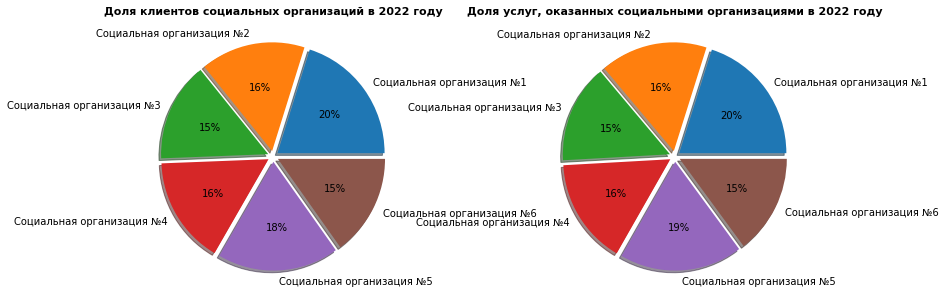

In [20]:
# Создадим табличку с количеством клиентов и услуг в разрезе организаций
qnt_company = data.groupby('company_name').agg({'client_id':'nunique', 'service_id':'count'})

# Посмотрим результат
display(qnt_company.reset_index().sort_values('client_id', ascending = False))

# Посмотрим результаты на круговой диаграмме
plt.rcParams["figure.figsize"] = [12, 5]


ax = plt.subplot(1,2,1)

plt.pie(qnt_company['client_id'], labels = qnt_company.index, autopct='%1.f%%',\
        explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), shadow = True)
ax.set_title('Доля клиентов социальных организаций в 2022 году', fontsize = 11, weight = 'extra bold')

ax1 = plt.subplot(1,2,2)
plt.pie(qnt_company['service_id'], labels = qnt_company.index, autopct='%1.f%%',\
        explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), shadow = True)
ax1.set_title('Доля услуг, оказанных социальными организациями в 2022 году', fontsize = 11, weight = 'extra bold')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Вывод:**

По графикам можно заметить, что количество клиентов и услуг в разрезе организаций рапспределено примерно одинаково. Но все же наибольшее количество клиентов и оказанных им услуг приходится на социальную организацю №1 и №5. 

**Посмотрим, какое количество услуг в среднем предоставлялось клиентам в каждой организации.**

### Среднее количество услуг на клиента в 2022 году

,company_name,client_id,service_id,avg
1,Социальная организация №2,374,4858,13.0
4,Социальная организация №5,434,5564,12.8
0,Социальная организация №1,477,6030,12.6
2,Социальная организация №3,349,4398,12.6
3,Социальная организация №4,379,4741,12.5
5,Социальная организация №6,358,4453,12.4


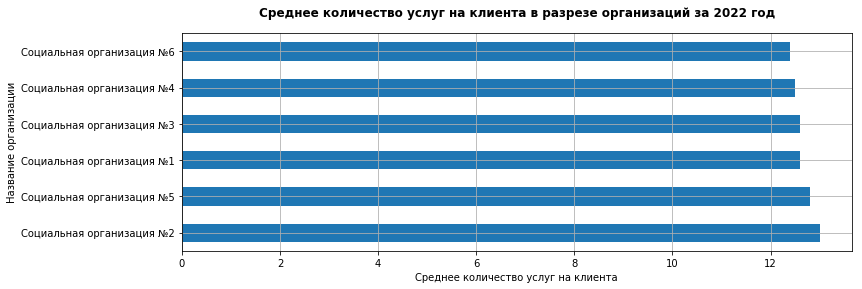

In [21]:
# Создадим таблицу с кол-во уникальных клиентов и кол-во услуг
avg_service = data.groupby('company_name', as_index = False).agg({'client_id':'nunique','service_id':'count'})

# Посчитаем среднее количество услуг на клиента
avg_service['avg'] = round(avg_service['service_id'] / avg_service['client_id'],1)


# Посмотрим результат
display(avg_service.sort_values('avg', ascending = False))


# Посмотрим на графике полученный результат
avg_service\
.sort_values('avg', ascending = False)\
.plot(x ='company_name', 
      y = 'avg', 
      kind = 'barh', 
      grid = True,
      legend = False,
      figsize = (12,4))

plt.xlabel('Среднее количество услуг на клиента')
plt.ylabel('Название организации')
plt.title('Среднее количество услуг на клиента в разрезе организаций за 2022 год',
          fontsize = 12, weight = 'extra bold', y = 1.05)
plt.show()

**Вывод:**

По графику видно, что, несмотря на явное лидерство социальных организаций №1 и №5 по количеству клиентов и оказанных услуг в 2022 году, лидером по среднему количеству услуг на клиента является социальная организация №2.

**Посмотрим в динамике по месяцам, как менялась картина.**

### Динамика количества клиентов и услуг в разрезе организаций в 2022 году

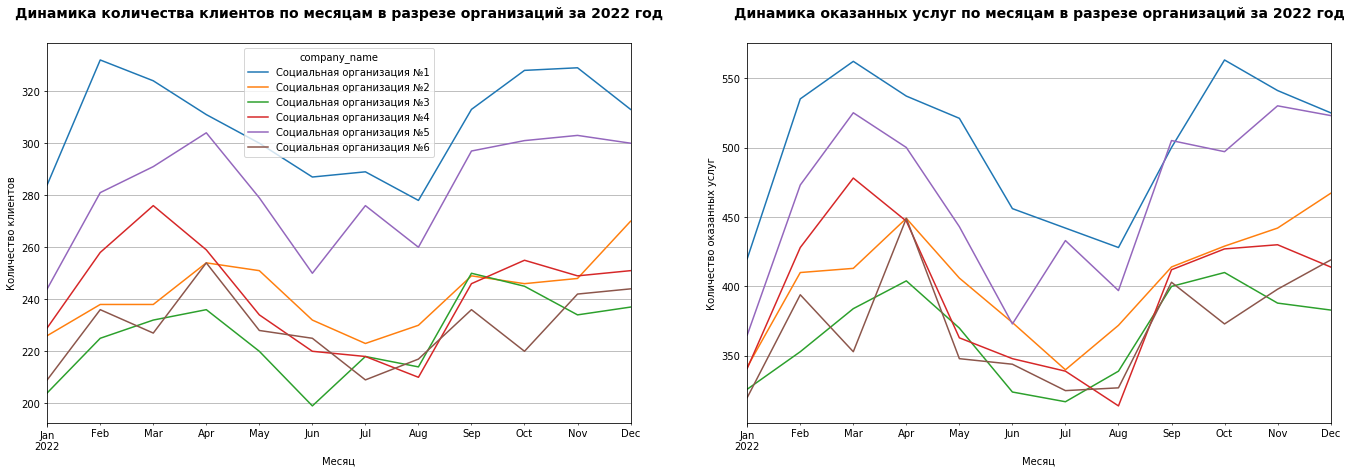

In [22]:
# Построим график динамики кол-ва клиентов по месяцам в разрезе организаций
plt.figure(figsize=(23, 7))

ax1 = plt.subplot(1, 2, 1)
data.pivot_table(index = 'month', 
                 columns = 'company_name', 
                 values = 'client_id', 
                 aggfunc = 'nunique').plot(ax=ax1)
ax1.grid (axis='y')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.title('Динамика количества клиентов по месяцам в разрезе организаций за 2022 год', 
          fontsize = 14, weight = 'extra bold', y = 1.05)

# Построим график динамики кол-ва услуг по месяцам в разрезе организаций
ax2 = plt.subplot(1, 2, 2)
data.pivot_table(index = 'month', 
                 columns = 'company_name', 
                 values = 'service_id', 
                 aggfunc = 'count').plot(legend=False, ax=ax2)
ax2.grid (axis='y')
plt.xlabel('Месяц')
plt.ylabel('Количество оказанных услуг')
plt.title('Динамика оказанных услуг по месяцам в разрезе организаций за 2022 год', 
          fontsize = 14, weight = 'extra bold', y = 1.05)
plt.show()

**Вывод:**

Виден явный рост количества клиентов с февраля по апрель - что связано с началом СВО, т.к. многие люди начали обращаться за социальными услугами. Начиная с мая и по июль видно явное снижение количества клиентов, которые обращаются за услугами, что связано с началом дачного сезона в мае и постепенным ростом в начале августа. Уже в сентябре случилась мобилизация и произошел резкий рост обращений за социальными услугами вплоть до ноября.

**Следует посмотреть за какими услугами обращались клиенты больше всего.**

### Популярность услуг в разрезе организаций в 2022 году

,service_name,client_id
0,Социально-правовые,7898
1,Социально-экономические,6815
2,Социально-психологические,6371
3,Социально-медицинские,4537
4,Социально-бытовые,4423


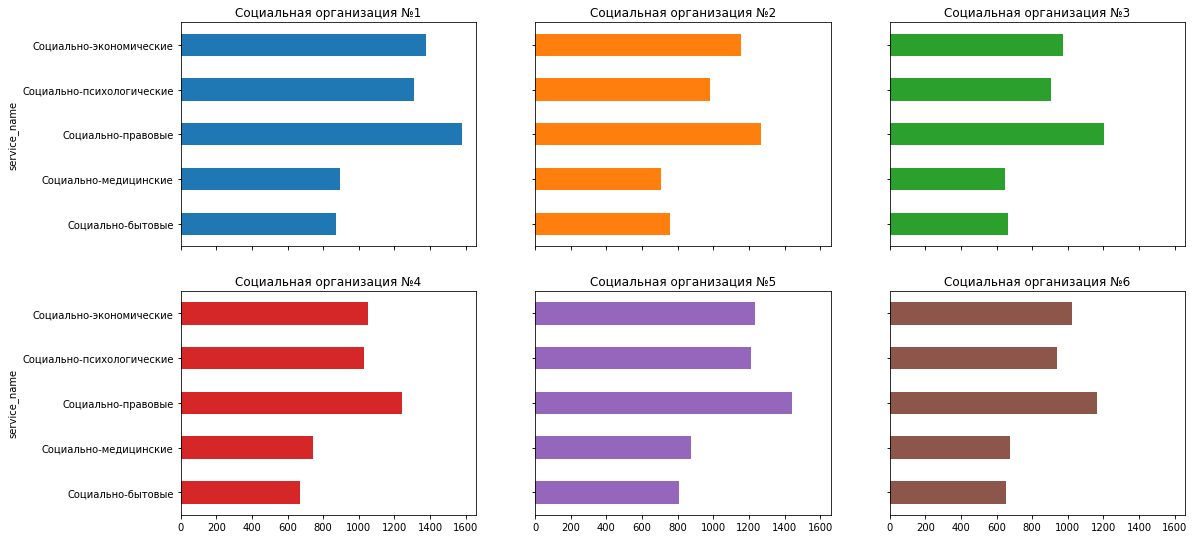

In [23]:
# Посмотрим, какие услуги предпочитают клиенты в разрезе организаций
company_service = data.pivot_table(index = 'service_name', 
                                   columns = 'company_name', values = 'client_id', aggfunc = 'count')

# Посмотрим количество услуг в 2022 году
display(data.pivot_table(index = 'service_name', values = 'client_id', aggfunc = 'count')\
       .sort_values('client_id', ascending = False).reset_index())

company_service.plot(subplots = True,
           layout = (3,3),    
           kind = 'barh',      
           figsize = (18,14),   
           sharey = True,     
           legend = False,    
           rot = 0)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

**Вывод:**

Во всех организациях клиенты предпочитают одни и те же услуги: социально-правовые услуги, социально-экономические, социально-психологические, социально-медицинские, социально-бытовые.

**Посмотрим, какие услуги пользуются популярностью в течение года.**

### Популярность  услуг по месяцам в 2022 году

In [24]:
import plotly
from plotly import figure_factory as FF
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import *
from plotly.graph_objs import *

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [25]:
# Создадим таблицу сгруппированную по названию и месяцу оказания услуги
qnt_service = data.groupby(['service_name', 'month'], as_index = False).agg({'client_id':'count'})

# Посмотрим результат на графике
trace = []

for i in qnt_service.service_name.unique():
    df_service = qnt_service.loc[qnt_service['service_name'] == i]
    trace_loc = go.Scatter(x = df_service['month'], y = df_service['client_id'], name = i)
    trace.append(trace_loc)
    fig = go.Figure(data = trace, layout = go.Layout(title = ''))
iplot(fig)

**Вывод:**

Как видно на графике, ситуация с предпочтениями клиентов по месяцам соответствует предпочтениям в каждой организации. Наибольшим спросом пользовались социально-правовые услуги, следом идут социально-экономические и социально-психологические. Явные всплески наблюдаются с февраля по апрель, что неудивительно т.к. после начала СВО многие люди начали обращаться за помощью к юристам, пытаться получить  материальные выплаты и психологическую помощь. Второй всплеск пришелся на сентябрь и октября, что связано с мобилизацией, где люди начали обращаться за теми же услугами, что и в начале года.

**Посмотрим, как обстоят дела с выручкой и затратами.**

### Выручка и прибыль в разрезе огранизаций в 2022 году

,company_name,revenue,profit
0,Социальная организация №1,6134557.7,1055300.6
4,Социальная организация №5,6118559.6,1396129.2
3,Социальная организация №4,5222680.8,1205234.0
1,Социальная организация №2,5127187.1,1025437.4
2,Социальная организация №3,4836475.2,1116109.7
5,Социальная организация №6,4710298.3,942059.7


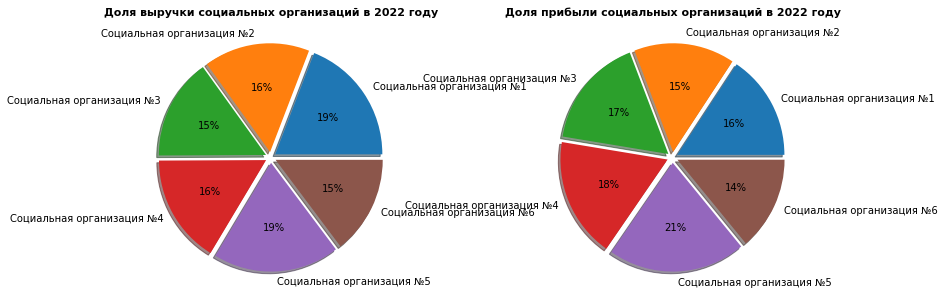

In [26]:
# Посчитаем выручку по каждой услуге
data['revenue'] = data['costs'] * data['rate']

# Создадим колонку с прибылью по каждой услуге
data['profit'] = data['revenue'] - data['costs']

# Создадим табличку с размером выручки и прибыли в разрезе организаций
amount = data.groupby('company_name').agg({'revenue':'sum', 'profit':'sum'})

# Посмотрим результатм
display(amount.reset_index().sort_values('revenue', ascending = False).round(1))

# Посмотрим результаты на круговой диаграмме
plt.rcParams["figure.figsize"] = [12, 5]

ax = plt.subplot(1,2,1)

plt.pie(amount['revenue'], labels = qnt_company.index, autopct='%1.f%%',\
        explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), shadow = True)
ax.set_title('Доля выручки социальных организаций в 2022 году', fontsize = 11, weight = 'extra bold')

ax1 = plt.subplot(1,2,2)
plt.pie(amount['profit'], labels = qnt_company.index, autopct='%1.f%%',\
        explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05), shadow = True)
ax1.set_title('Доля прибыли социальных организаций в 2022 году', fontsize = 11, weight = 'extra bold')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Вывод:**

На графике видно, что явными лидерами по выручке являются социальная организация №1 и №5, однако, если мы посмотрим на прибыль, которую получают организации, то видно, что социальная организация №1 не входит даже в топ 3 самых прибыльных организаций, которыми являются социальные организации №5, №4 и №3.

**Посмотрим среднюю прибыль c клиента в разрезе организаций**

### Средняя прибыль с клиента в разрезе организаций в 2022 году

,company_name,profit_per_client
4,Социальная организация №5,3216.89
2,Социальная организация №3,3198.02
3,Социальная организация №4,3180.04
1,Социальная организация №2,2741.81
5,Социальная организация №6,2631.45
0,Социальная организация №1,2212.37


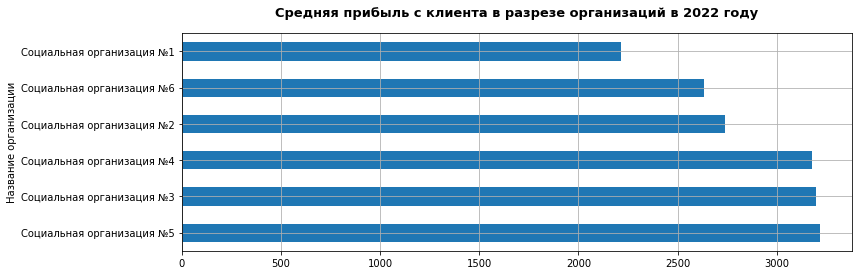

In [27]:
# Создадим таблицу с кол-во уникальных клиентов и кол-во услуг
avg_money = data.groupby('company_name', as_index = False)\
.agg({'revenue':'sum', 'profit':'sum','client_id':'nunique' })

# Посчитаем среднее количество услуг на клиента
avg_money['revenue_per_client'] = round(avg_money['revenue'] / avg_money['client_id'], 2)

# Посчитаем среднее количество услуг на клиента
avg_money['profit_per_client'] = round(avg_money['profit'] / avg_money['client_id'],2)


# Посмотрим среднюю прибыль на клиента
display(avg_money.sort_values('profit_per_client', ascending = False)[['company_name','profit_per_client']])


# Посмотрим на графике полученный результат
avg_money\
.sort_values('revenue_per_client', ascending = False)\
.plot(x ='company_name', 
      y = 'profit_per_client', 
      kind = 'barh', 
      grid = True,
      legend = False,
      figsize = (12,4))

plt.ylabel('Название организации')
plt.title('Средняя прибыль с клиента в разрезе организаций в 2022 году',
          fontsize = 13, weight = 'extra bold', y = 1.05)

plt.show()

**Вывод:**

Средняя прибыль с клиента является одним из ключевых индикаторов успешности бизнеса наравне с количеством привлеченных клиентов. Если мы посмотрим на график, то увидим, что больше всех с одного клиента зарабатывает социальная организация №5, рядом расположились социальная организация №3 и №4, а социальная организация №1 имеющая наибольшее количество клиентов - расположилась на последнем месте.

**Посмотрим в динамике по месяцам, как менялась картина.**

### Динамика выручки/прибыли в разрезе организаций в 2022 году

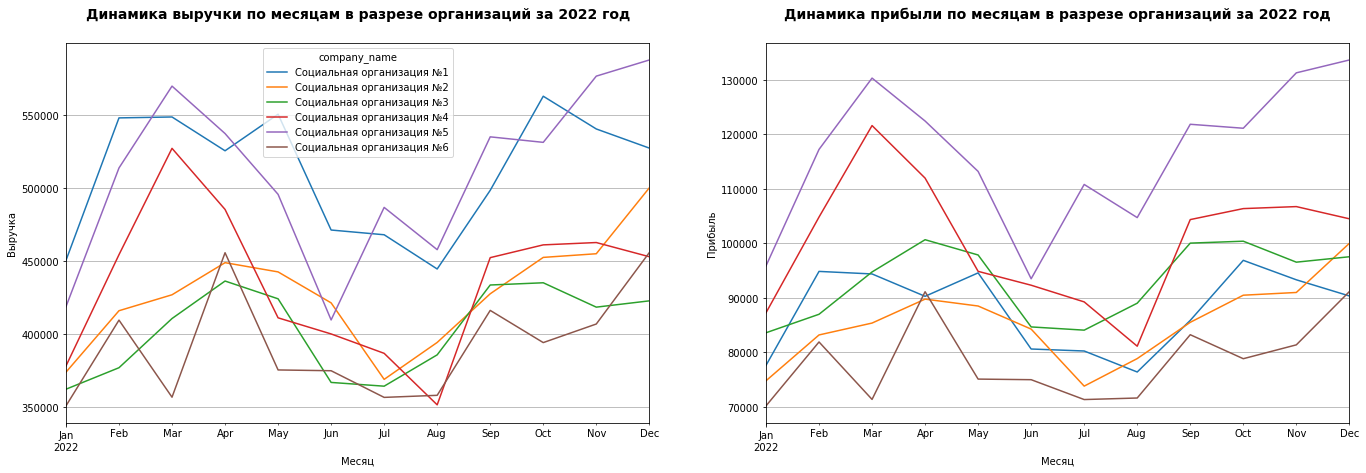

In [28]:
# Посчитаем выручку по каждой услуге
data['revenue'] = data['costs'] * data['rate']

# Создадим колонку с прибылью по каждой услуге
data['profit'] = data['revenue'] - data['costs']


# Посмотрим динамику выручки и прибыли по месяцам в разрезе организаций
plt.figure(figsize=(23, 7))

ax = plt.subplot(1, 2, 1)
data.pivot_table(index = 'month', 
                 columns = 'company_name', 
                 values = 'revenue', 
                 aggfunc = 'sum').plot(ax=ax)
ax.grid (axis='y')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('Динамика выручки по месяцам в разрезе организаций за 2022 год', fontsize = 14, weight = 'extra bold', y = 1.05)

ax1 = plt.subplot(1, 2, 2)
data.pivot_table(index = 'month', 
                 columns = 'company_name', 
                 values = 'profit', 
                 aggfunc = 'sum').plot(legend=False, ax=ax1)
ax1.grid (axis='y')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.title('Динамика прибыли по месяцам в разрезе организаций за 2022 год', fontsize = 14, weight = 'extra bold', y = 1.05)
plt.show()

**Вывод:**

На графике видно, что повторяется ситуация с количеством клиентов и услуг, где лидерами по выручке являются социальные организации №5 и 1, а по прибыли социальные организации №5,4 и 3. Однако, стоит отметить, что социальная организация №5 имела более стабильный поток прибыли летом в отличии от остальных.

**Посмотрим, за счет каких услуг больше всего зарабатывают социальные организации.**

### Прибыльность услуг в разрезе организаций в 2022 году

,service_name,profit
0,Социально-медицинские,374.7
1,Социально-бытовые,271.4
2,Социально-правовые,204.7
3,Социально-экономические,173.6
4,Социально-психологические,163.3


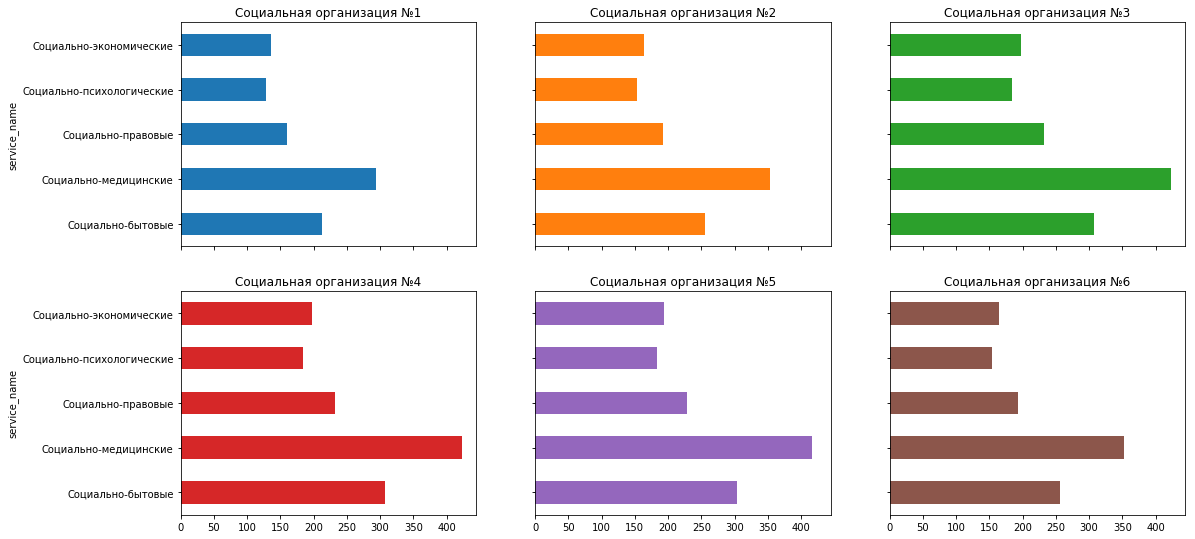

In [29]:
# Посмотрим какие услуги приносят больше всего прибыли в каждой организации
company_profit = data.pivot_table(index = 'service_name', 
                                   columns = 'company_name', values = 'profit', aggfunc = 'mean')

# Посмотрим среднюю прибыльность услуг в 2022 году
display(data.pivot_table(index = 'service_name', values = 'profit', aggfunc = 'mean')\
       .sort_values('profit', ascending = False).reset_index().round(1))


company_profit.plot(subplots = True,
           layout = (3,3),    
           kind = 'barh',      
           figsize = (18,14),   
           sharey = True,     
           legend = False,    
           rot = 0)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

**Вывод:**

По графикам видно, что в структуре прибыли каждой организации в основном преобдалают социально-медицинские и социально-бытовые услуги. Однако, стоит обратить внимание на тот факт, что самыми популярными услугами все же являются социально-правовые, социально-экономические и социально-психологические.

**Посмотрим, какие услуги приносили больше всего прибыли в каждый месяц.**

### Прибыльность услуг по месяцам

In [30]:
# Создадим таблицу сгруппированную по названию и месяцу оказания услуги
profit_service = data.groupby(['service_name', 'month'], as_index = False).agg({'profit':'sum'})

# Посмотрим результат
trace = []

for i in profit_service.service_name.unique():
    df_profit = profit_service.loc[profit_service['service_name'] == i]
    trace_loc = go.Scatter(x = df_profit['month'], y = df_profit['profit'], name = i)
    trace.append(trace_loc)
    fig = go.Figure(data = trace, layout = go.Layout(title = ''))
iplot(fig)

**Вывод:**

На графике видны те же самые всплески социально-правовых, социально-экономических и социально-психологических услуг. Однако, видно что все услуги кроме социально-медицинских и социально-бытовых имеют существенную просадку летом. При условии, что предпочтения услуг в каждой организации идентичны, то благодаря социально-медицинским и социально-бытовым услугам (которые также являются самыми маржинальными), мы частично покрываем потери по оставшимся услугам.

## Общий вывод

**Стояла следующая задача:**

Провести сравнительный анализ социальных организаций с целью выявления узких мест и потенциальных точек роста эффективности.

**Целевая метрика - прибыль организации.**

** Для увеличения целевой метрики - прибыли, необходимо добиться:**
- увеличения количества клиентов;
- увеличения среднего количества полученных услуг на клиента;
- увеличения средней прибыли с клиента.

**1. В рамках исследования социальных организаций выявлены следующие особенности в данных:**
- В 2022 году было 2 явных всплеска количества клиентов и количества предоставленных услуг - с февраля по апрель и с сентября по ноябрь. Первый всплеск связан с началом СВО, а второй с началом мобилизации. В эти периоды произошел резкий рост количества оказанных социально-правовых, социально-экономических и социально-психологических услуг, что закономерно, т.к. многие люди начали обращаться за помощью к юристам, пытаться получить различные материальные выплаты, а также психологическую помощь.
- Летом 2022 года произошло сезонное снижение количества клиентов и предоставленных услуг - с мая по сентябрь. Это связано с началом дачного сезона и сезона отпусков.
- Фактор сезонности или всплески, которые наблюдались весной и осенью не оказали существенного влияния на количество предоставленных социально-медицинских и социально-бытовых услуг. Это связано с тем, что данные типы услуг предоставляются чаще всего на дому людям, испытывающим проблемы с самостоятельным передвижением, ориентированием в пространстве и получением услуг (как правило, маломобильные).
- Отсутствуют различия в предпочтениях клиентов тех или иных услуг между организациями. Клиенты независимо от организации, как правило, обращаются за базовыми услугами - решение правовых и юридических вопросов, психологическая поддержка в трудной жизненной ситуации и тд.

**2. По результатам сравнительного анализа социальных организаций были подготовлены следующие рекомендации:**
1. `Социальной организации №1` необходимо **увеличить среднее количество предоставляемых услуг на клиента** за счет предоставления большего количества услуг существующей клиентской базе. Добиться **увеличения средней прибыли с клиента** за счет дополнительного предоставления клиентам более маржинальных услуг, таких как `социально-медицинских`, `социально-бытовых` и `социально-правовых`.
2. `Социальной организации №2` необходимо **увеличить количество клиентов** за счет адресной работы с населением района, в том числе с помощью холодных звонков. Добиться **увеличения средней прибыли с клиента** за счет дополнительного предоставления клиентам более маржинальных услуг, таких как `социально-медицинских`, `социально-бытовых` и `социально-правовых`.
3. `Социальной организации №3` необходимо **увеличить количество клиентов** за счет адресной работы с населением района, в том числе с помощью холодных звонков. Добиться **увеличения среднего количества предоставляемых услуг на клиента** за счет предоставления большего количества услуг существующей клиентской базе, а также новым клиентам.
4. `Социальной организации №4` необходимо **увеличить количество клиентов** за счет адресной работы с населением района, в том числе с помощью холодных звонков. Добиться **увеличения среднего количества предоставляемых услуг на клиента** за счет предоставления большего количества услуг существующей клиентской базе, а также новым клиентам.
5. `Социальная организация №5` входит в топ 2 основных показателей. В целом, необходимо продолжать **осуществлять свою деятельность на том же уровне**.
6. `Социальной организации №6` необходимо **увеличить количество клиентов** за счет адресной работы с населением района, в том числе с помощью холодных звонков. Добиться **увеличения среднего количества предоставляемых услуг на клиента** за счет предоставления большего количества услуг существующей клиентской базе, а также новым клиентам. Также **увеличить среднюю прибыль с клиента** за счет дополнительного предоставления более маржинальных услуг, таких как `социально-медицинских`, `социально-бытовых` и `социально-правовых`.